install kaggle:

In [25]:
!pip install kaggle

dataset:

import kaggle.json:

In [26]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"reyhaneshirani","key":"d650f21d3a85952cae14e468381eeb6e"}'}

redirect kaggle.json:

In [27]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

download dataset:

In [41]:
!kaggle datasets download -d sanjeetsinghnaik/google-recaptcha

Dataset URL: https://www.kaggle.com/datasets/sanjeetsinghnaik/google-recaptcha
License(s): MIT
 96% 378M/392M [00:07<00:00, 66.4MB/s]
100% 392M/392M [00:07<00:00, 56.0MB/s]


unzip it:

In [42]:
!unzip google-recaptcha.zip -d recaptcha_dataset

Streaming output truncated to the last 5000 lines.
  inflating: recaptcha_dataset/data/train/Car/Car (3141).png  
  inflating: recaptcha_dataset/data/train/Car/Car (3142).png  
  inflating: recaptcha_dataset/data/train/Car/Car (3143).png  
  inflating: recaptcha_dataset/data/train/Car/Car (3144).png  
  inflating: recaptcha_dataset/data/train/Car/Car (3145).png  
  inflating: recaptcha_dataset/data/train/Car/Car (3146).png  
  inflating: recaptcha_dataset/data/train/Car/Car (3147).png  
  inflating: recaptcha_dataset/data/train/Car/Car (3148).png  
  inflating: recaptcha_dataset/data/train/Car/Car (3149).png  
  inflating: recaptcha_dataset/data/train/Car/Car (315).png  
  inflating: recaptcha_dataset/data/train/Car/Car (3150).png  
  inflating: recaptcha_dataset/data/train/Car/Car (3151).png  
  inflating: recaptcha_dataset/data/train/Car/Car (3152).png  
  inflating: recaptcha_dataset/data/train/Car/Car (3153).png  
  inflating: recaptcha_dataset/data/train/Car/Car (3154).png  
  inf

install YOLOv5

In [30]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17483, done.
remote: Total 17483 (delta 0), reused 0 (delta 0), pack-reused 17483 (from 1)
Receiving objects: 100% (17483/17483), 16.55 MiB | 24.60 MiB/s, done.
Resolving deltas: 100% (11995/11995), done.
/content/yolov5/yolov5/yolov5


Running YOLOv5 on images

In [54]:
import os
import shutil
from glob import glob

# Path to the new output folder
flat_dir = '/content/recaptcha_dataset/flat_images'
os.makedirs(flat_dir, exist_ok=True)

# Find and move all images from subfolders
all_images = glob('/content/recaptcha_dataset/data/train/*/*.png')
print(f'Moving {len(all_images)} images to flat directory...')

for img_path in all_images:
    shutil.copy(img_path, flat_dir)

print(f'All images moved to {flat_dir}')


Moving 9384 images to flat directory...
All images moved to /content/recaptcha_dataset/flat_images


In [50]:
!python detect.py --weights yolov5s.pt \
                  --source /content/recaptcha_dataset/flat_images \
                  --conf 0.4 \
                  --save-txt \
                  --save-conf

Streaming output truncated to the last 5000 lines.
image 4388/9384 /content/recaptcha_dataset/flat_images/Car (3144).png: 640x640 (no detections), 398.9ms
image 4389/9384 /content/recaptcha_dataset/flat_images/Car (3145).png: 640x640 (no detections), 394.7ms
image 4390/9384 /content/recaptcha_dataset/flat_images/Car (3146).png: 640x640 (no detections), 389.8ms
image 4391/9384 /content/recaptcha_dataset/flat_images/Car (3147).png: 640x640 (no detections), 400.8ms
image 4392/9384 /content/recaptcha_dataset/flat_images/Car (3148).png: 640x640 (no detections), 389.4ms
image 4393/9384 /content/recaptcha_dataset/flat_images/Car (3149).png: 640x640 (no detections), 405.3ms
image 4394/9384 /content/recaptcha_dataset/flat_images/Car (315).png: 640x640 (no detections), 393.0ms
image 4395/9384 /content/recaptcha_dataset/flat_images/Car (3150).png: 640x640 1 car, 1 traffic light, 394.7ms
image 4396/9384 /content/recaptcha_dataset/flat_images/Car (3151).png: 640x640 1 person, 4 cars, 2 traffic ligh

In [55]:
import os

output_dir = '/content/yolov5/runs/detect'
exps = sorted([d for d in os.listdir(output_dir) if 'exp' in d], reverse=True)
latest_exp = os.path.join(output_dir, exps[0])
print("Path to the latest YOLO output:", latest_exp)



Path to the latest YOLO output: /content/yolov5/runs/detect/exp3


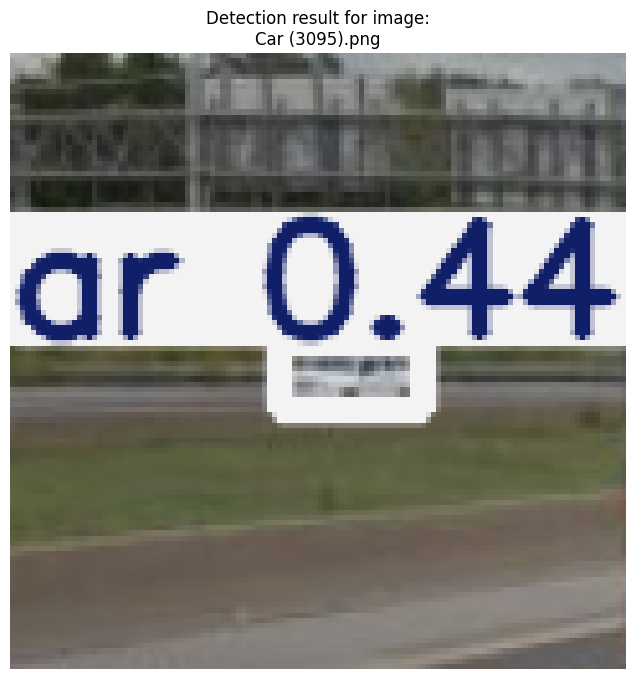

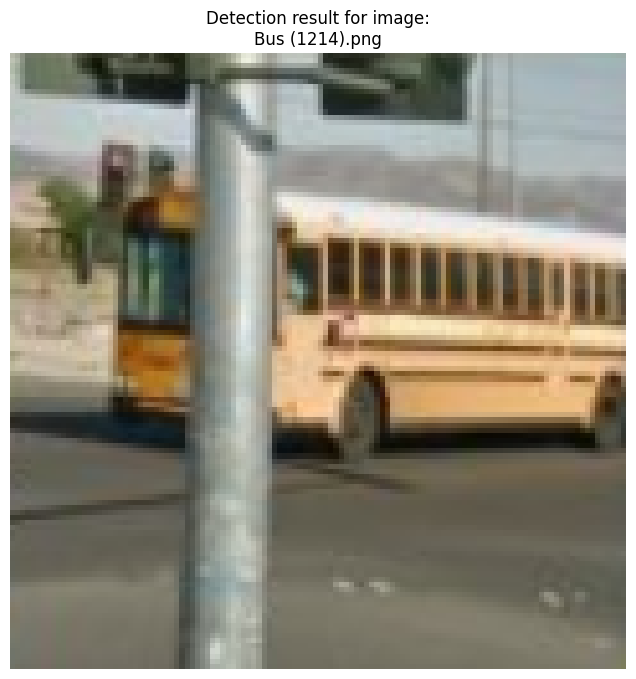

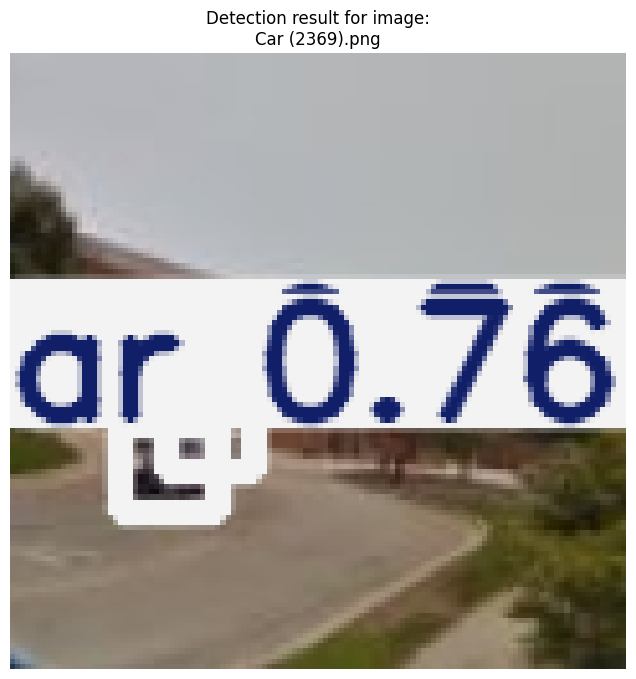

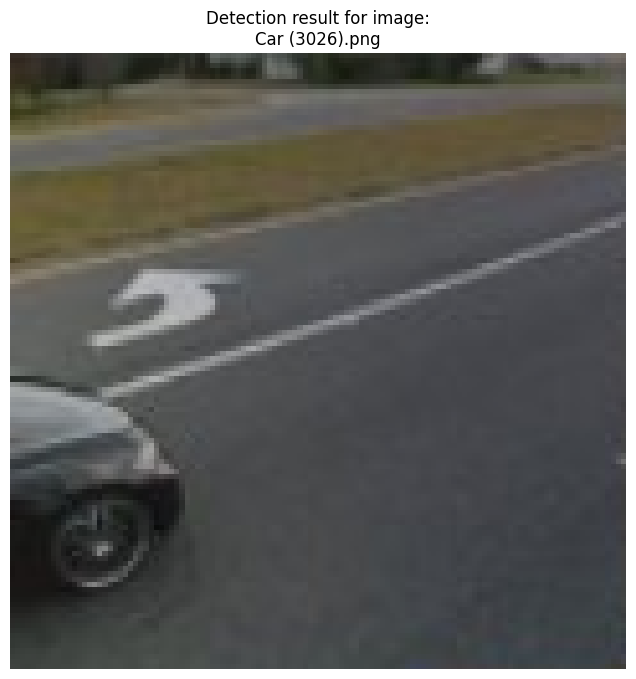

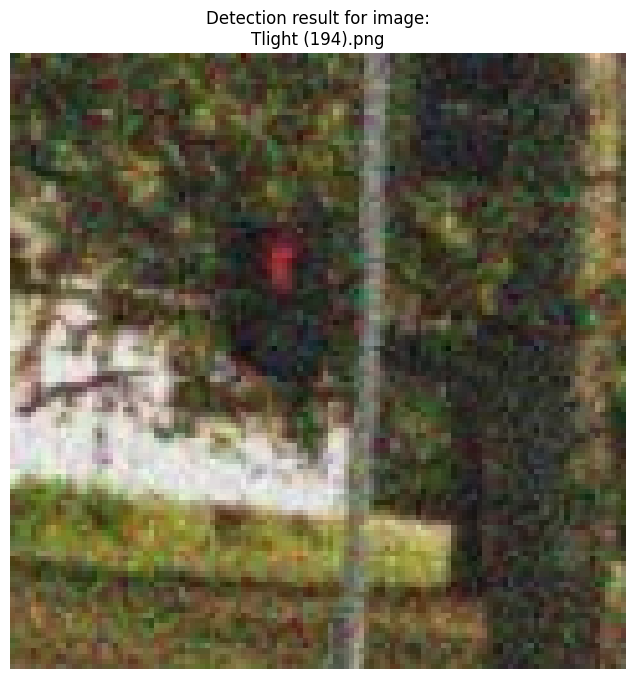

In [56]:
import glob
import random
import matplotlib.pyplot as plt
import cv2

#Path to the folder containing YOLO-processed images
img_output_path = latest_exp

#Retrieve all YOLO output images with jpg/png format
img_paths = glob.glob(f"{img_output_path}/*.jpg") + glob.glob(f"{img_output_path}/*.png")

# Select 5 random images
sample_imgs = random.sample(img_paths, 5)

for img_path in sample_imgs:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # To display colors correctly

    plt.figure(figsize=(8,8))
    plt.imshow(img)
    plt.title(f"Detection result for image:\n{os.path.basename(img_path)}")
    plt.axis('off')
    plt.show()


In [57]:
def print_detection_results(image_path):
    base_name = os.path.basename(image_path)
    label_file = os.path.join(latest_exp, 'labels', base_name.replace('.jpg', '.txt').replace('.png', '.txt'))

    if not os.path.exists(label_file):
        print(f"No detection file found for image {base_name}.")
        return

    with open(label_file, 'r') as f:
        lines = f.readlines()
        if len(lines) == 0:
            print(f"⚠️ No objects detected in image {base_name}.")
            return

        print(f"Detected objects in {base_name}:")
        for line in lines:
            parts = line.strip().split()
            class_id = int(parts[0])
            conf = float(parts[-1])
            print(f" - Class: {class_id}, Confidence: {conf:.2f}")

#Display detection results for 5 selected images
for img_path in sample_imgs:
    print_detection_results(img_path)
    print('-' * 50)


Detected objects in Car (3095).png:
 - Class: 2, Confidence: 0.44
--------------------------------------------------
No detection file found for image Bus (1214).png.
--------------------------------------------------
Detected objects in Car (2369).png:
 - Class: 2, Confidence: 0.58
 - Class: 2, Confidence: 0.76
--------------------------------------------------
No detection file found for image Car (3026).png.
--------------------------------------------------
No detection file found for image Tlight (194).png.
--------------------------------------------------
